# Proyecto - Primer Avance

Samantha Sánchez Tinoco

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Sitios web de los que se obtendrá la información
urls = {
    'AgustD' : 'https://kworb.net/spotify/artist/5RmQ8k4l3HZ8JoPb4mNsML_songs.html',
    'BTS': 'https://kworb.net/spotify/artist/3Nrfpe0tUJi4K4DXYWgMUX_songs.html',
    'JHope' : 'https://kworb.net/spotify/artist/0b1sIQumIAsNbqAoIClSpy_songs.html',
    'Jimin' : 'https://kworb.net/spotify/artist/1oSPZhvZMIrWW5I41kPkkY_songs.html',
    'Jin' : 'https://kworb.net/spotify/artist/5vV3bFXnN6D6N3Nj4xRvaV_songs.html',
    'Jungkook' : 'https://kworb.net/spotify/artist/6HaGTQPmzraVmaVxvz6EUc_songs.html',
    'RM' : 'https://kworb.net/spotify/artist/2auC28zjQyVTsiZKNgPRGs_songs.html',
    'Suga' : 'https://kworb.net/spotify/artist/0ebNdVaOfp6N0oZ1guIxM8_songs.html',
    'V' : 'https://kworb.net/spotify/artist/3JsHnjpbhX4SnySpvpa9DK_songs.html'
}

In [4]:
def scrape_data(url):
    response = requests.get(url)

    if response.status_code == 200:
        # Analizar el contenido del HTML del sitio
        soup = BeautifulSoup(response.text, 'html.parser')

        # Encontrar las tablas del sitio
        tables = soup.find_all('table')

        # Extraer la primer tabla y sus datos
        if len(tables) > 0:
            song_table = tables[0]
            song_rows = song_table.find_all('tr')

            # Inicializar las listas para los datos de la tabla
            songs = []
            total_streams = []
            as_lead_streams = []
            solo_streams = []
            as_feature_streams = []

            # Iterar las filas para obtener los datos
            for row in song_rows[1:]:  # Saltar los títulos
                columns = row.find_all('td')
                songs.append(columns[0].text.strip())
                total_streams.append(columns[1].text.strip())
                as_lead_streams.append(columns[2].text.strip())
                solo_streams.append(columns[3].text.strip())
                as_feature_streams.append(columns[4].text.strip())

            # Crear un dataframe con los datos
            song_data = {
                'Song': songs,
                'Total Streams': total_streams,
                'As Lead Streams': as_lead_streams,
                'Solo Streams': solo_streams,
                'As Feature Streams': as_feature_streams
            }
            df_songs = pd.DataFrame(song_data)
        else:
            print("No song data found on the page")
            return None

        # Extraer la segundo tabla en el sitio
        if len(tables) > 1:
            additional_table = tables[1]
            additional_rows = additional_table.find_all('tr')

            # Inicializar las listas para la tabla
            song_titles = []
            streams = []
            daily = []

            # Iterar en las filas y extraer datos
            for row in additional_rows[1:]:  # Saltar los títulos de las columnas
                columns = row.find_all('td')
                song_titles.append(columns[0].text.strip())
                streams.append(columns[1].text.strip())
                if len(columns) > 2:
                    daily.append(columns[2].text.strip())
                else:
                    daily.append('')  # Dejar en blanco si no hay datos de streams diarios

            # Crear un dataframe para los datos
            additional_data = {
                'Song Title': song_titles,
                'Streams': streams,
                'Daily': daily
            }
            df_additional = pd.DataFrame(additional_data)
        else:
            print("No additional data found on the page")
            return None

        return df_songs, df_additional

    else:
        print("Failed to retrieve the website")
        return None, None

In [5]:
data_frames = {}

#Iterar sobre cada uno de los sitios web en urls y utilizar la función para hacer el web scrapping
for name, url in urls.items():
    print(f"Scraping data for {name}...")
    df_songs, df_additional = scrape_data(url)
    if df_songs is not None and df_additional is not None:  # Verificar si los DataFrames no son None
        data_frames[name] = {'songs': df_songs, 'additional': df_additional}


Scraping data for AgustD...
Scraping data for BTS...
Scraping data for JHope...
Scraping data for Jimin...
Scraping data for Jin...
Scraping data for Jungkook...
Scraping data for RM...
Scraping data for Suga...
Scraping data for V...


In [7]:
#Imprimir uno de los dataframes para visualizarlo y verificar que se obtuvo correctamente la información
def print_website_data(data_frames, website_name):
    if website_name in data_frames:
        dfs = data_frames[website_name]
        print(f"\nData for {website_name}:")
        print("Artist Info:")
        print(dfs['songs'])
        print("\nSong Data:")
        print(dfs['additional'])
    else:
        print(f"Website '{website_name}' not found.")

print_website_data(data_frames, 'V')



Data for V:
Artist Info:
      Song  Total Streams As Lead Streams   Solo Streams As Feature Streams
0  Streams  2,352,261,972   2,282,748,993  2,057,738,820         69,512,979
1    Daily      4,981,995       4,518,139      4,251,660            463,856
2   Tracks             21              17             12                  4

Song Data:
                                           Song Title      Streams      Daily
0                                       Love Me Again  442,106,730  1,882,338
1                                      Christmas Tree  383,579,011    162,243
2                                         Sweet Night  366,054,708    135,173
3                                        Slow Dancing  314,334,140    784,107
4                                          Rainy Days  218,620,076    467,335
5                                 It's Definitely You  175,343,253    128,148
6                                              For Us   87,320,311    231,807
7                                 

In [15]:
#Nombre del artista que se quiere visualizar
#Originalmente había hecho un for loop para que hiciera de una vez los cálculos de todos los artistas pero al ser muchos datos era complicado visualizarlos
#También hice esto con un .describe() pero no me pareció que la visualziación de los datos fuera ideal

nombre_artista = 'V' 

#Verificar que el nombre del aritsta ingresado esté en los dataframes
if nombre_artista in data_frames:
    dfs = data_frames[nombre_artista]
    
    # Verificar si se encontraro la segunda tabla para el artista
    if dfs['additional'] is not None:
        df_additional = dfs['additional']
        
        #Reproducciones en total por canción
        print(f"{nombre_artista} - Streams:")
        if df_additional['Streams'].dtype == 'object':  # Verificar si los datos son de tipo string
            df_additional['Streams'] = df_additional['Streams'].str.replace(',', '').astype(float)
        print("Media:", round(df_additional['Streams'].mean(), 2))
        print("Mediana:", df_additional['Streams'].median())
        print("Máximo:", df_additional['Streams'].max())
        print("Mínimo:", df_additional['Streams'].min())
        print("Desviación Estándar:", round(df_additional['Streams'].std(), 2))
        print("Rango Intercuartil (IQR):", df_additional['Streams'].quantile(0.75) - df_additional['Streams'].quantile(0.25))
        print("Percentil 25:", df_additional['Streams'].quantile(0.25))
        print("Percentil 75:", df_additional['Streams'].quantile(0.75))
        print("Skewness:", round(df_additional['Streams'].skew(), 2))
        print("Kurtosis:", round(df_additional['Streams'].kurtosis(), 2))
        
        #Reproducciones diarias de las canciones
        print(f"\n{nombre_artista} - Daily:")
        if df_additional['Daily'].dtype == 'object':  # Verificar si los datos son de tipo string
            df_additional['Daily'] = df_additional['Daily'].str.replace(',', '')  # Eliminar comas
            df_additional['Daily'] = df_additional['Daily'].str.extract('(\d+)', expand=False)  # Extraer solo los dígitos
            df_additional['Daily'] = pd.to_numeric(df_additional['Daily'], errors='coerce')  # Convertir a tipo float
        print("Media:", round(df_additional['Daily'].mean(), 2))
        print("Mediana:", df_additional['Daily'].median())
        print("Máximo:", df_additional['Daily'].max())
        print("Mínimo:", df_additional['Daily'].min())
        print("Desviación Estándar:", round(df_additional['Daily'].std(), 2))
        print("Rango Intercuartil (IQR):", df_additional['Daily'].quantile(0.75) - df_additional['Daily'].quantile(0.25))
        print("Percentil 25:", df_additional['Daily'].quantile(0.25))
        print("Percentil 75:", df_additional['Daily'].quantile(0.75))
        print("Skewness:", round(df_additional['Daily'].skew(), 2))
        print("Kurtosis:", round(df_additional['Daily'].kurtosis(), 2))
    else:
        print(f"No se encontraron datos adicionales para {nombre_artista}.")
else:
    print(f"No se encontraron datos para el artista {nombre_artista}.")



V - Streams:
Media: 112012474.86
Mediana: 27033241.0
Máximo: 442106730.0
Mínimo: 213915.0
Desviación Estándar: 144720714.02
Rango Intercuartil (IQR): 164810301.0
Percentil 25: 10532952.0
Percentil 75: 175343253.0
Skewness: 1.29
Kurtosis: 0.26

V - Daily:
Media: 237237.86
Mediana: 84587.0
Máximo: 1882338
Mínimo: 6511
Desviación Estándar: 424549.85
Rango Intercuartil (IQR): 212856.0
Percentil 25: 17338.0
Percentil 75: 230194.0
Skewness: 3.27
Kurtosis: 11.96


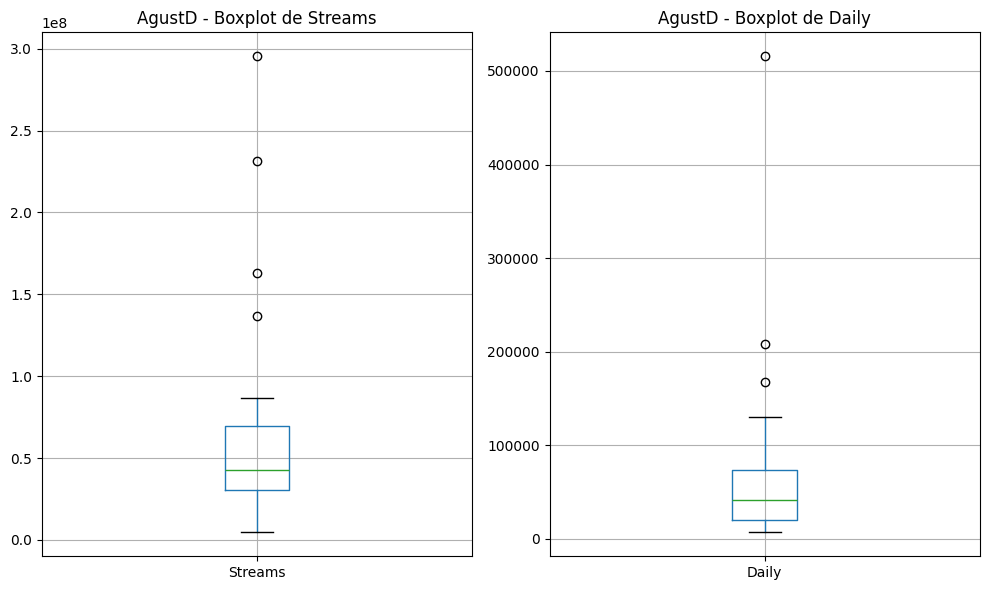

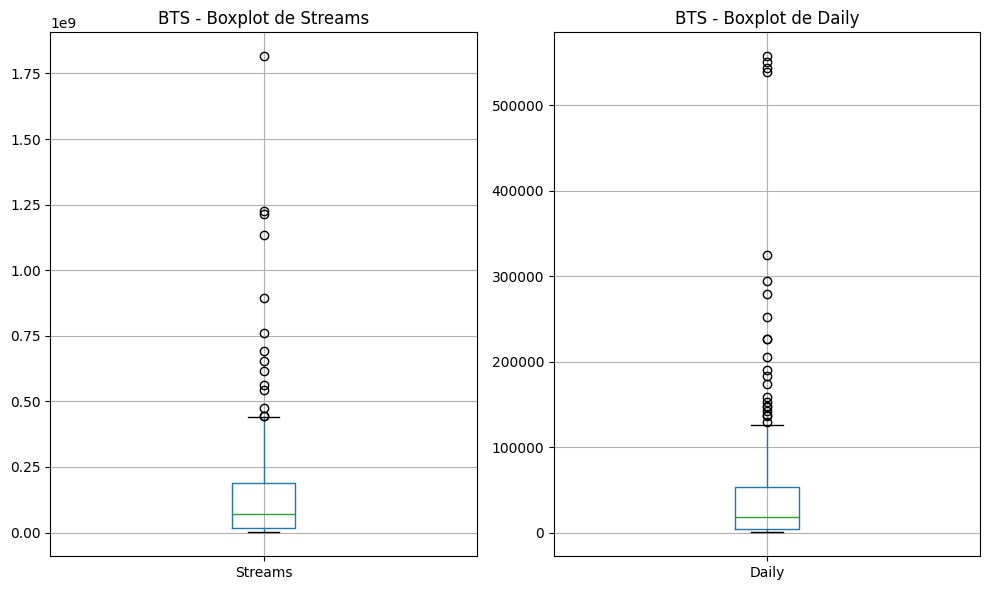

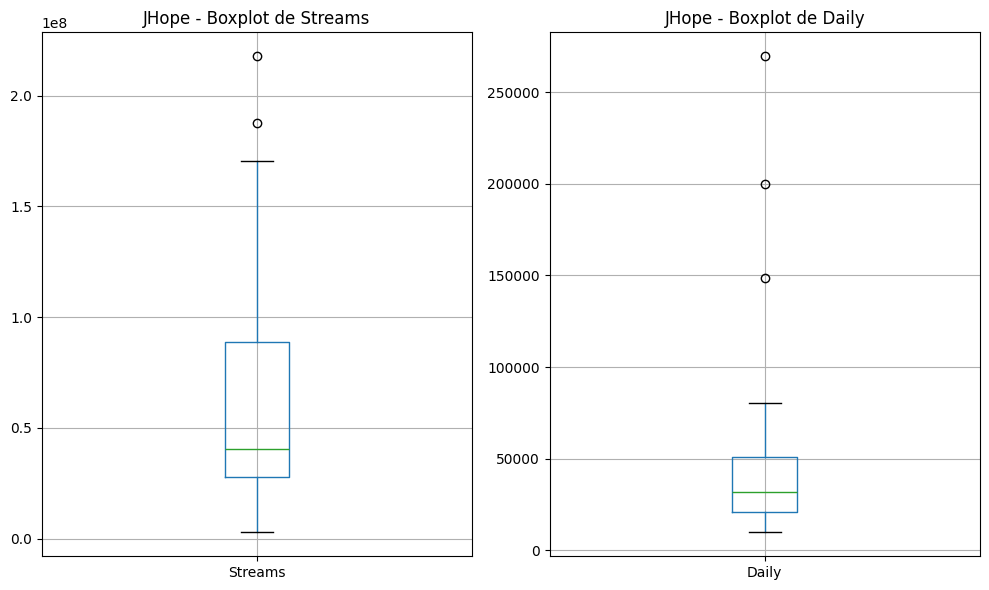

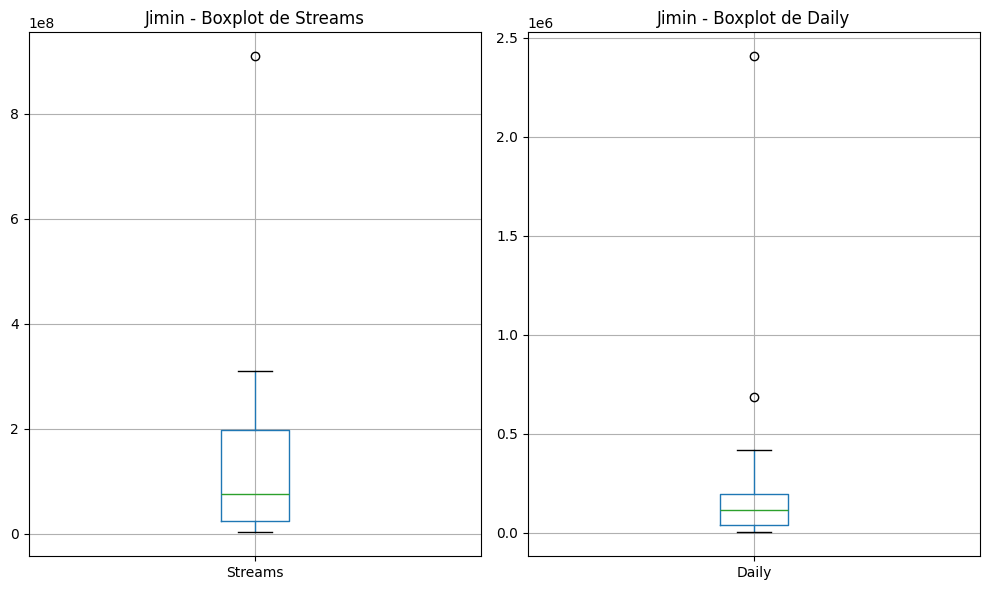

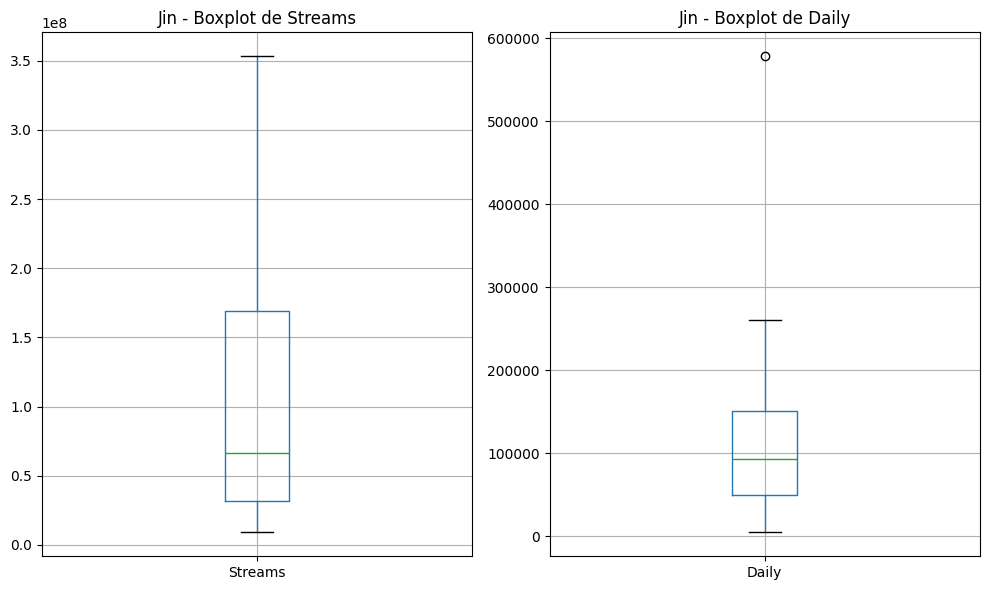

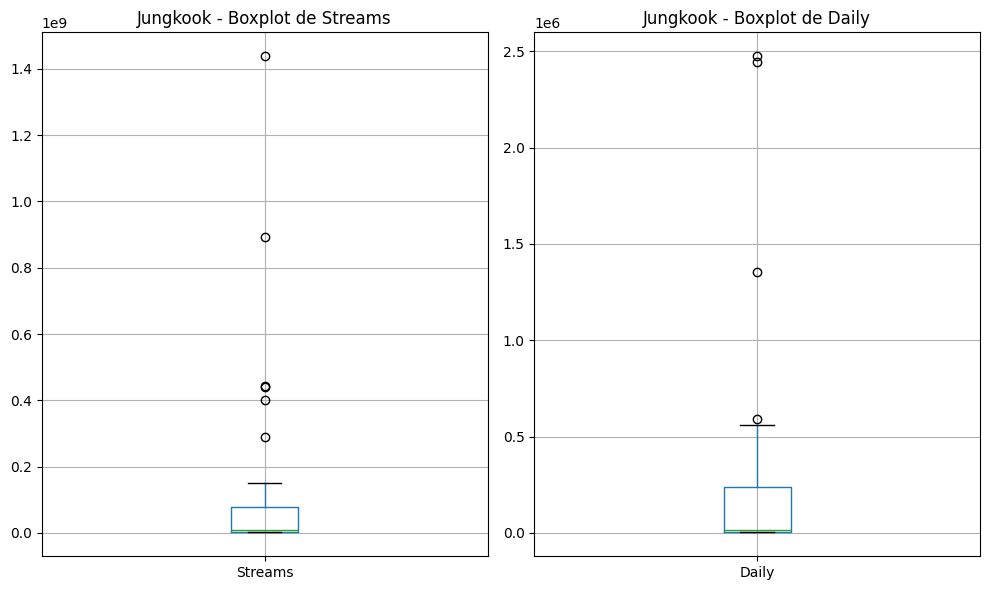

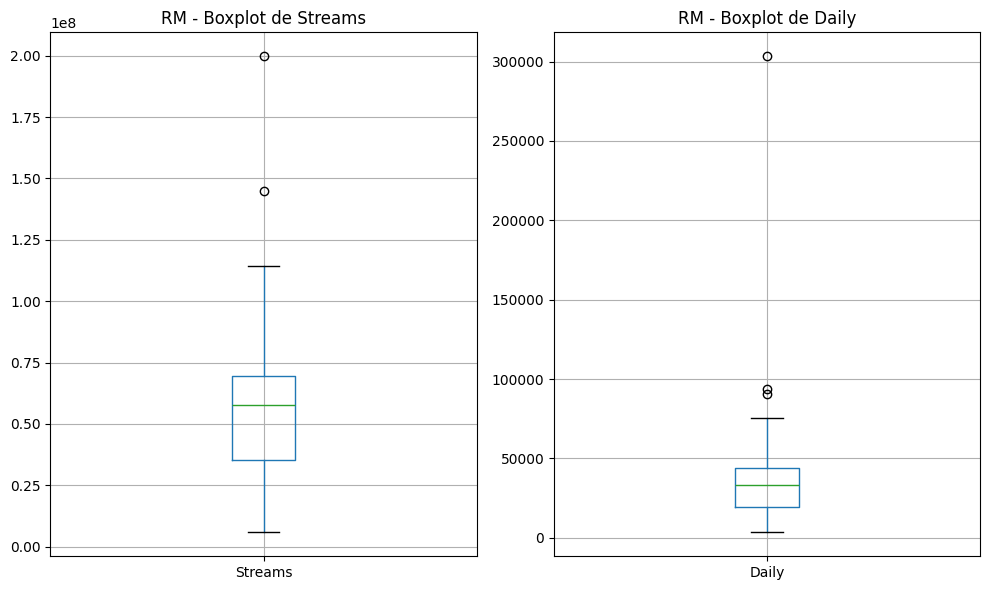

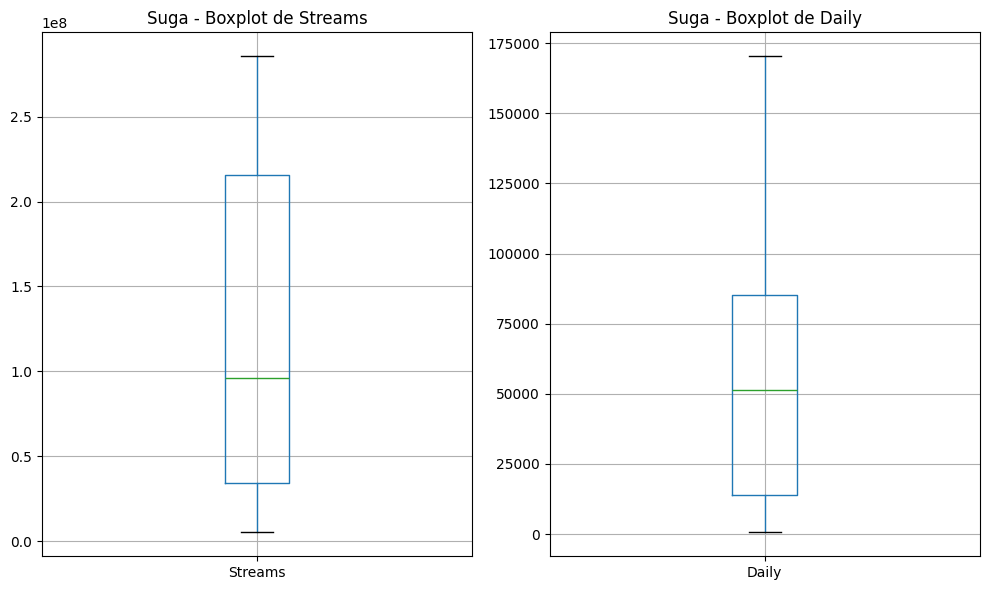

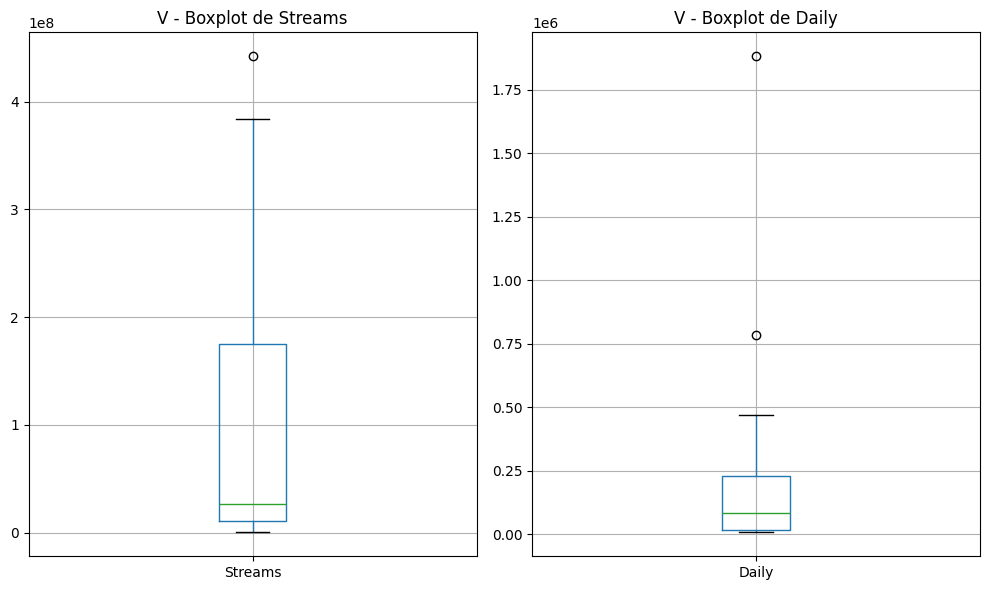

In [24]:
#Crear boxplots para las reproducciones totales y diarias de cada perfil/artista

for nombre_artista, dfs in data_frames.items():
    df_additional = dfs['additional']
        
    # Verificar si los datos son de tipo string y convertirlos a float si es necesario
    if 'Streams' in df_additional.columns and df_additional['Streams'].dtype == 'object': 
        df_additional['Streams'] = df_additional['Streams'].str.replace(',', '').astype(float)
        
    if 'Daily' in df_additional.columns and df_additional['Daily'].dtype == 'object':  
        df_additional['Daily'] = df_additional['Daily'].str.replace(',', '')  
        df_additional['Daily'] = df_additional['Daily'].str.extract('(\d+)', expand=False)  
        df_additional['Daily'] = pd.to_numeric(df_additional['Daily'], errors='coerce')  

    # Verificar si las columnas existen después de las conversiones
    if 'Streams' in df_additional.columns and 'Daily' in df_additional.columns:
        # Crear los boxplots
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        df_additional.boxplot(column='Streams')
        plt.title(f'{nombre_artista} - Boxplot de Streams')

        plt.subplot(1, 2, 2)
        df_additional.boxplot(column='Daily')
        plt.title(f'{nombre_artista} - Boxplot de Daily')

        plt.tight_layout()
        plt.show()


Generando scatter plot para AgustD...


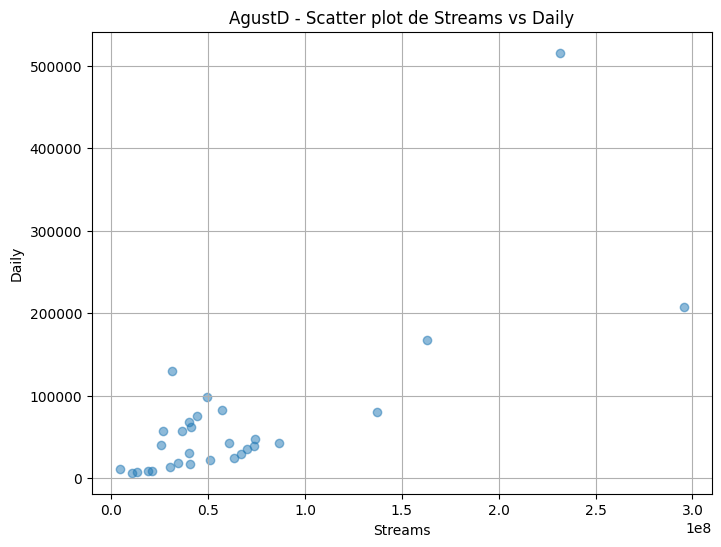

Generando scatter plot para BTS...


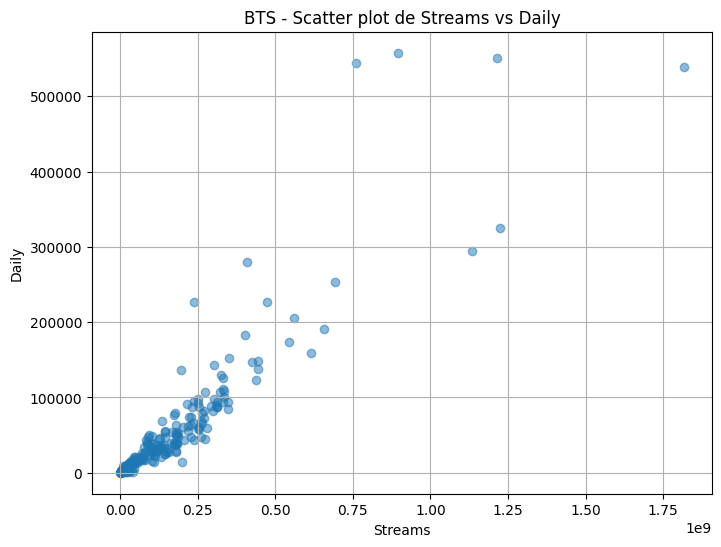

Generando scatter plot para JHope...


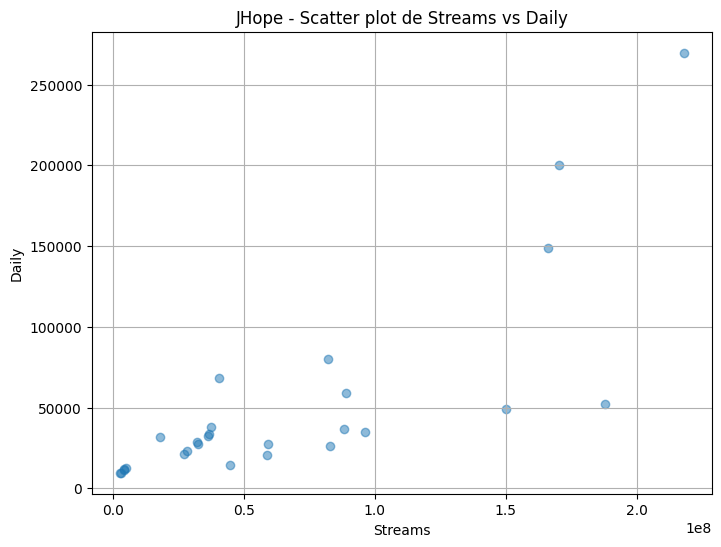

Generando scatter plot para Jimin...


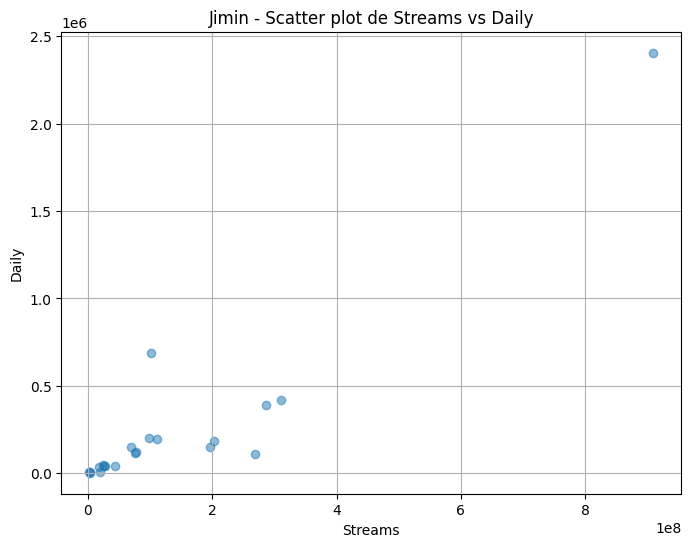

Generando scatter plot para Jin...


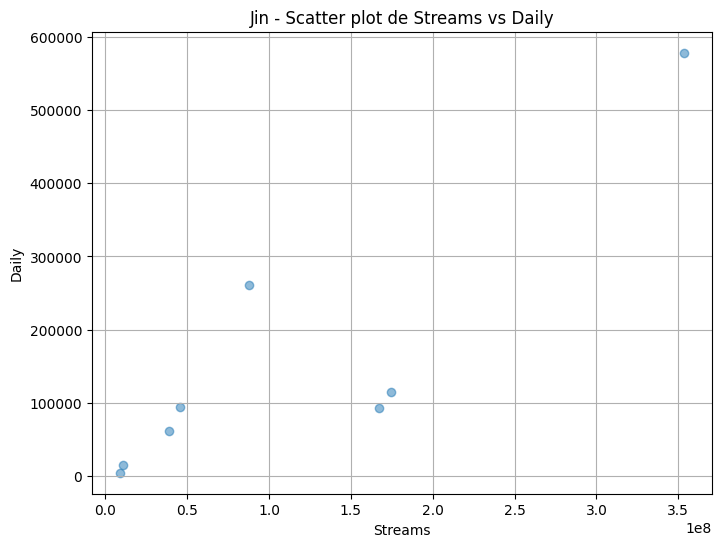

Generando scatter plot para Jungkook...


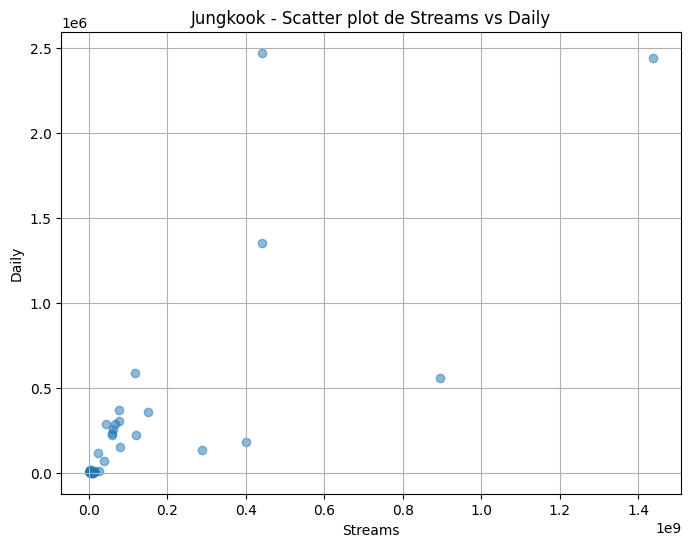

Generando scatter plot para RM...


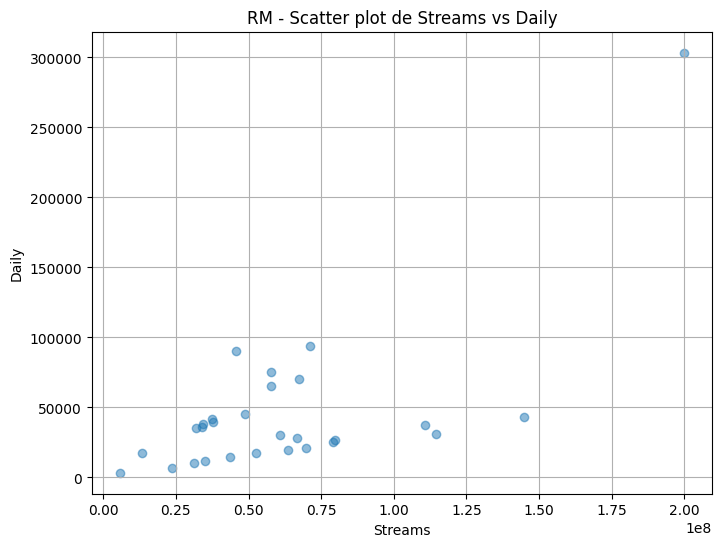

Generando scatter plot para Suga...


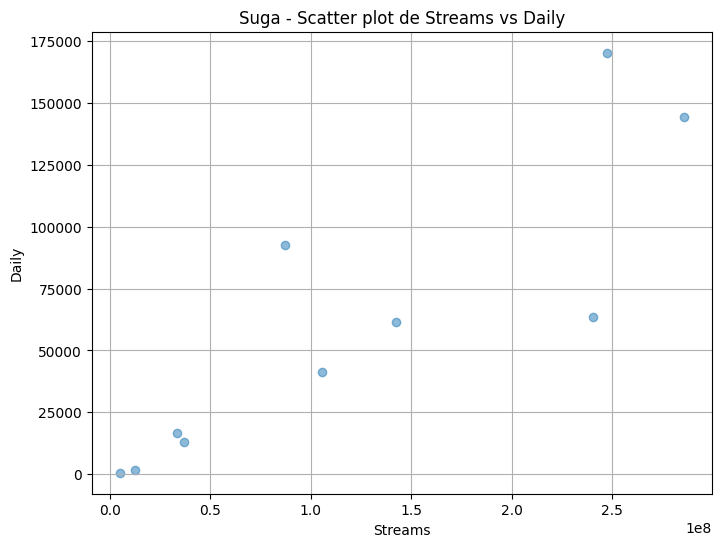

Generando scatter plot para V...


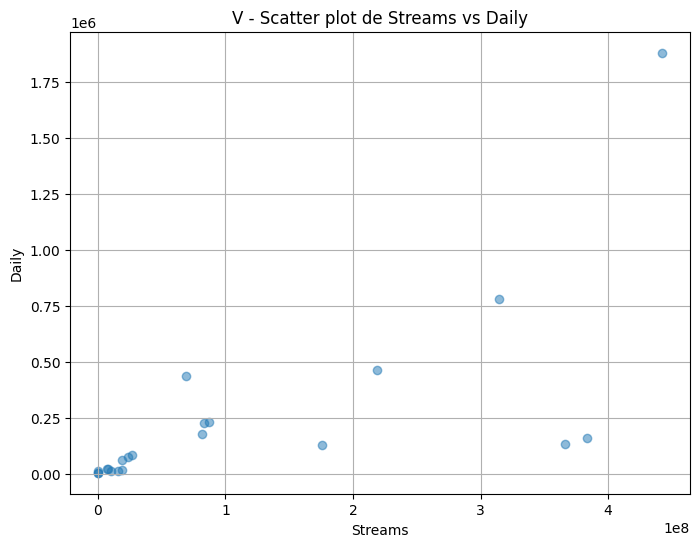

In [25]:
#Crear los diagramas de dispersión comparando las reproducciones totales en x y las reproducciones diarias en y

for nombre_artista, dfs in data_frames.items():
    df_additional = dfs['additional']
        
    # Verificar si los datos son de tipo string y convertirlos a float si es necesario
    if 'Streams' in df_additional.columns and df_additional['Streams'].dtype == 'object': 
        df_additional['Streams'] = df_additional['Streams'].str.replace(',', '').astype(float)
        
    if 'Daily' in df_additional.columns and df_additional['Daily'].dtype == 'object':  
        df_additional['Daily'] = df_additional['Daily'].str.replace(',', '')  
        df_additional['Daily'] = df_additional['Daily'].str.extract('(\d+)', expand=False)  
        df_additional['Daily'] = pd.to_numeric(df_additional['Daily'], errors='coerce')  

    # Verificar si las columnas existen después de las conversiones
    if 'Streams' in df_additional.columns and 'Daily' in df_additional.columns:
        # Crear scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df_additional['Streams'], df_additional['Daily'], alpha=0.5)
        plt.title(f'{nombre_artista} - Scatter plot de Streams vs Daily')
        plt.xlabel('Streams')
        plt.ylabel('Daily')
        plt.grid(True)
        plt.show()